# IRIS CLASSIFICATION THROUGH KNN

----------

<b>Importing Libraries</b>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

<b>Loading Iris Dataset

In [23]:
iris = pd.read_csv("iris.data.csv")

In [24]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Specie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
iris.shape

(150, 5)

In [26]:
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Specie          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<b>Visualizing Iris Dataset 

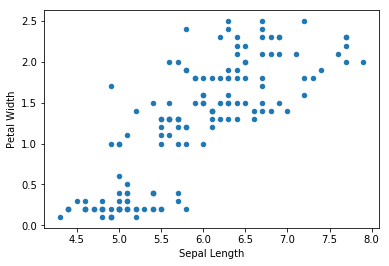

In [31]:
iris.plot(kind="scatter",x="Sepal Length",y="Petal Width")

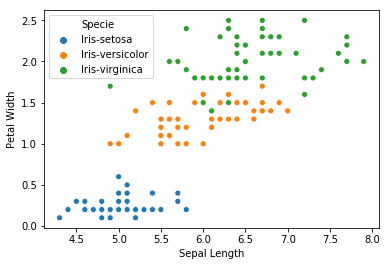

In [52]:
sns.scatterplot(x=iris["Sepal Length"],y=iris["Petal Width"], hue=iris["Specie"])

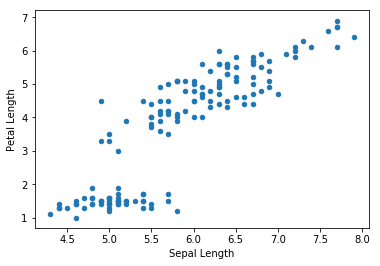

In [33]:
iris.plot(kind="scatter",x="Sepal Length",y="Petal Length")

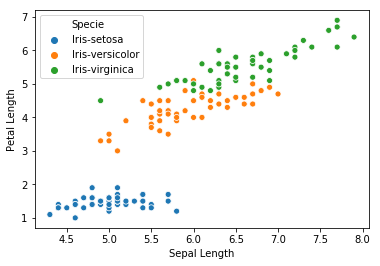

In [51]:
sns.scatterplot(x=iris["Sepal Length"],y=iris["Petal Length"], hue=iris["Specie"])

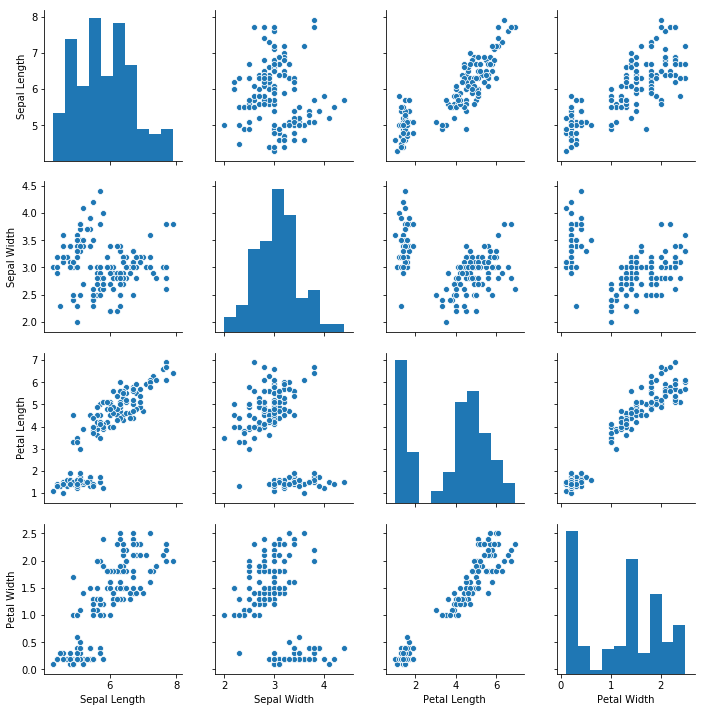

In [34]:
sns.pairplot(iris)

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


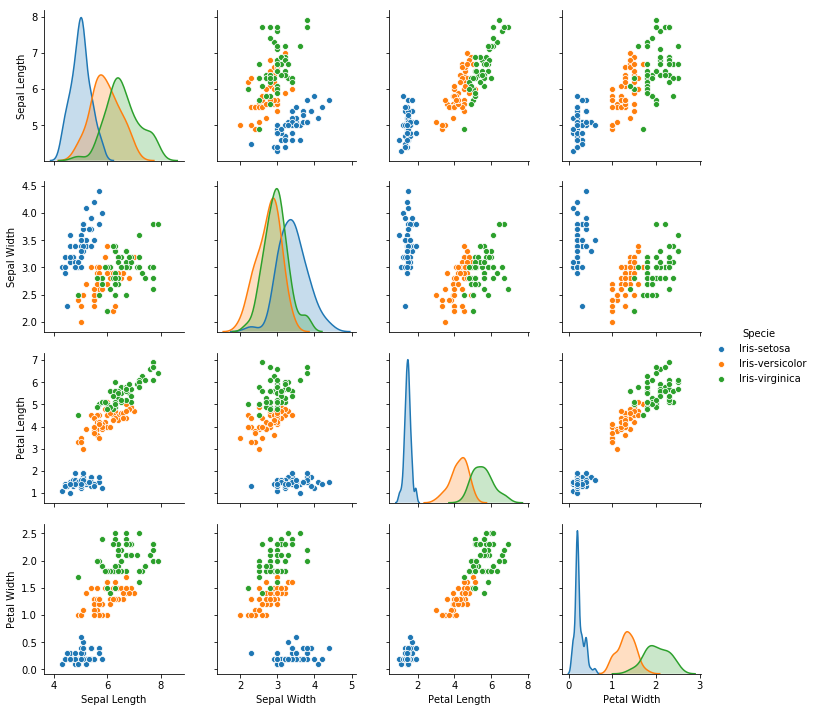

In [50]:
sns.pairplot(iris, hue="Specie")

<b>Splitting Dataset In X And Y Sets

In [56]:
X = iris.iloc[:,0:4]
Y = iris["Specie"]

print(X.head())
print("\n",Y.head())

   Sepal Length  Sepal Width  Petal Length  Petal Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Specie, dtype: object


<b>Encoding Categorical Y Feature

In [58]:
encoder = LabelEncoder()

In [60]:
Y = encoder.fit_transform(Y)

In [61]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

<b>Making Train And Test Sets

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, train_size=0.8)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [79]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


<b>Creating KNN Classifiaction Model And Fitting Train Values

In [80]:
knn = KNeighborsClassifier(n_neighbors=3)

In [81]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

<b>Predicting Test Sets

In [82]:
y_pred = knn.predict(X_test)

In [83]:
print("Test Predictions \n {}", format(y_pred))
print("Original Values \n {}",format(Y_test))

Test Predictions 
 {} [1 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]
Original Values 
 {} [1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


<b>Model Evaluations And Report

In [85]:
print("Accuracy of KNN Algorithm: ", knn.score(X_test,Y_test)*100)

Accuracy of KNN Algorithm:  96.66666666666667


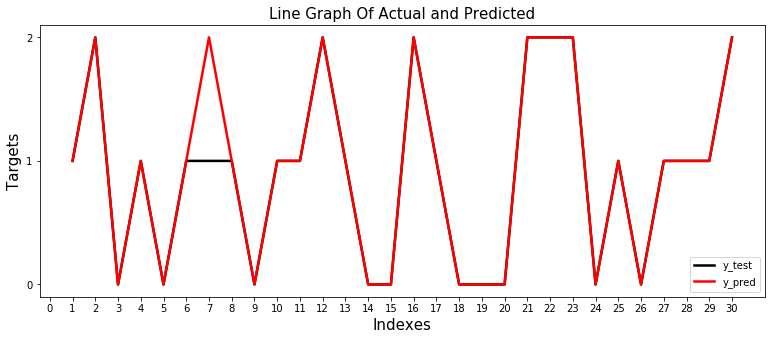

In [89]:
c = [i for i in range(1,31)]
fig = plt.figure(figsize=(13,5))
plt.plot(c,Y_test, color="black", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
plt.title("Line Graph Of Actual and Predicted", fontsize=15)
plt.xlabel("Indexes", fontsize=15)
plt.ylabel("Targets", fontsize=15)
plt.yticks(np.arange(0,3))
plt.xticks(np.arange(0,31))
plt.legend(labels=["y_test","y_pred"],loc=4)
plt.show()

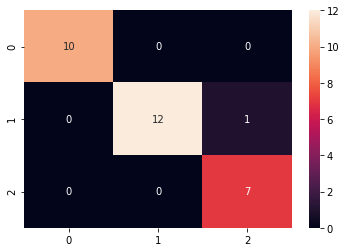

In [91]:
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True)

In [92]:
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.92      0.96        13
          2       0.88      1.00      0.93         7

avg / total       0.97      0.97      0.97        30



-------

<b>Conclusion:</b>
The KNN Classifier Model accuracy for Iris Specie prediction is 97%. We can conclude this experiment by considering this KNN Classifier as a strong model for the unseen Iris data and Specie prediction.  